In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve, savgol_filter, detrend
from scipy.fft import fft
import pywt
from sklearn.decomposition import PCA
import os
import seaborn as sns

In [17]:
font_style ={
    'font.size': 20,
    'font.family': 'Arial',
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
}
sns.set_theme(style='darkgrid', palette='RdBu')

In [2]:
data_dir = 'data/'
df = getData(data_dir)
df

error file: apple.dat


wavelength       640       641       642       643       644       645  \
0           0.126331  0.126273  0.126215  0.126215  0.126040  0.125808   
1           0.142547  0.142366  0.142245  0.142185  0.142065  0.141824   
2           0.067932  0.068034  0.068135  0.068186  0.068186  0.068288   
3           0.033483  0.033342  0.033248  0.033201  0.033108  0.032920   
4           0.082862  0.082862  0.082967  0.083073  0.083020  0.082915   
...              ...       ...       ...       ...       ...       ...   
2348        0.187421  0.186953  0.186419  0.185952  0.185553  0.185153   
2349        0.223226  0.222863  0.222501  0.222138  0.221776  0.221415   
2350        0.216168  0.215954  0.215597  0.215169  0.214670  0.214243   
2351        0.246340  0.245958  0.245422  0.244888  0.244430  0.244201   
2352        0.053695  0.053548  0.053449  0.053351  0.053204  0.052959   

wavelength       646       647       648       649  ...      1042      1043  \
0           0.125634  0.125692  0.125866  0.125808  ...  0.149905  0.149783   
1           0.141403  0.141042  0.140742  0.140561  ...  0.177309  0.177113   
2           0.068390  0.068593  0.068898  0.069357  ...  0.127844  0.127494   
3           0.032733  0.032592  0.032546  0.032686  ...  0.085551  0.086557   
4           0.082810  0.082862  0.083125  0.083493  ...  0.142969  0.142366   
...              ...       ...       ...       ...  ...       ...       ...   
2348        0.184821  0.184489  0.184090  0.183825  ...  0.093557  0.093396   
2349        0.221126  0.220764  0.220404  0.220187  ...  0.138048  0.138346   
2350        0.213888  0.213604  0.213391  0.213249  ...  0.137988  0.136499   
2351        0.244049  0.243744  0.243288  0.242832  ...  0.173277  0.171340   
2352        0.052762  0.052664  0.052566  0.052419  ...  0.031984  0.030537   

wavelength      1044      1045      1046      1047      1048      1049  \
0           0.149538  0.149231  0.148803  0.148253  0.147764  0.147642   
1           0.176330  0.175094  0.174055  0.173472  0.173277  0.172825   
2           0.127669  0.127494  0.126040  0.125228  0.125344  0.124707   
3           0.086557  0.085287  0.083757  0.083073  0.083336  0.083599   
4           0.142607  0.142547  0.141102  0.140381  0.140621  0.139542   
...              ...       ...       ...       ...       ...       ...   
2348        0.093503  0.093611  0.093611  0.092965  0.091890  0.091461   
2349        0.138585  0.137690  0.135608  0.134896  0.135726  0.135548   
2350        0.136083  0.135964  0.134955  0.134541  0.135015  0.135074   
2351        0.171405  0.171920  0.170632  0.169925  0.170632  0.170761   
2352        0.030631  0.031144  0.030537  0.030444  0.031144  0.031050   

wavelength      1050  category  
0           0.147947         1  
1           0.171920         1  
2           0.123955         1  
3           0.083651         1  
4           0.138764         1  
...              ...       ...  
2348        0.091301         0  
2349        0.134837         0  
2350        0.134363         0  
2351        0.169861         0  
2352        0.030305         0  

[2353 rows x 412 columns]

In [8]:
# 遍历目录中的所有文件
directory = 'data/'
data = {}

for filename in os.listdir(directory):
    if filename.endswith(".txt"):  # 确保只处理.txt文件
        prefix = filename.split('_')[0]  # 获取前缀
        print(prefix)
        if prefix.isdigit():
            category = int(prefix)  # 数字前缀直接转为整数
        else:
            # 根据字母前缀分配类别
            category_map = {'N': 'NSF', 'A': 70.5, 'B': 86.5, 'C': 140, 'D': 240, 'E': 800}
            category = category_map.get(prefix, None)
        
        # 如果这个类别是第一次出现，初始化一个列表
        if category not in data:
            data[category] = []
        
        # 构建完整的文件路径
        file_path = os.path.join(directory, filename)
        # 读取文件，跳过前10行
        df = pd.read_csv(file_path, delimiter=',', skiprows=10, encoding='latin1')
        # 将DataFrame存储在对应的类别下
        data[category].append(df)

1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
1004
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
17

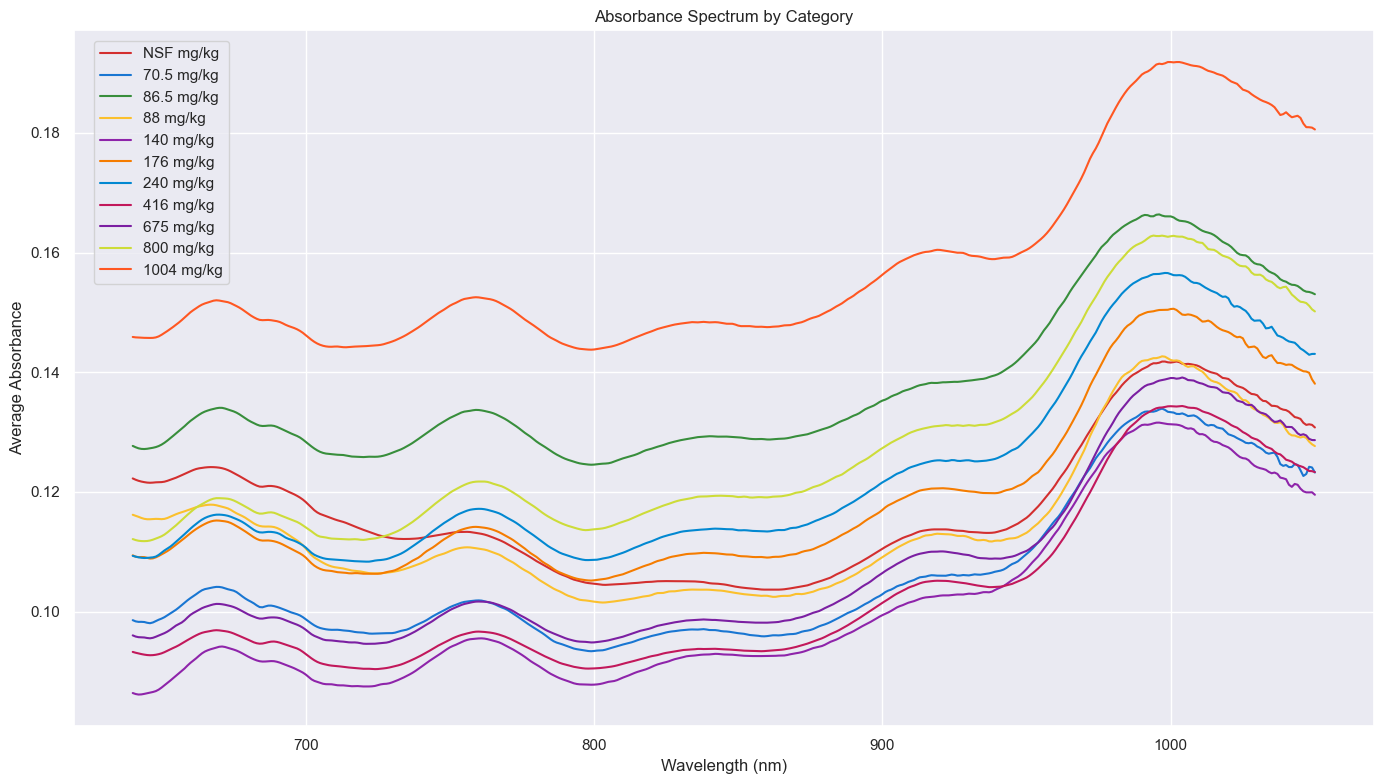

In [42]:
# 创建渐变色数组
colors = ["#D32F2F", "#1976D2", "#388E3C", "#FBC02D", "#8E24AA", "#F57C00", "#0288D1", "#C2185B", "#7B1FA2", "#CDDC39", "#FF5722", "#0097A7"]

# 将类别按照NSF为最低，然后数字升序排序
categories = sorted(data.keys(), key=lambda x: (x != 'NSF', x))

# 重新映射排序后的类别到颜色
sorted_colors = {cat: col for cat, col in zip(categories, colors)}

# 创建一个图表
plt.figure(figsize=(14, 8))

# 处理每个类别的数据
for category in categories:
    dfs = data[category]
    color = sorted_colors[category]
    
    # 合并同一类别的所有DataFrame
    combined_df = pd.concat(dfs)
    
    # 计算每个波长的平均吸光度
    mean_absorbance = combined_df.groupby('#waveLength(nm)')['absorbance'].mean()
    
    # 绘制波长-吸光度曲线
    plt.plot(mean_absorbance.index, mean_absorbance, label=f'{category} mg/kg', color=color)

# 添加图表标签和标题
plt.xlabel('Wavelength (nm)')
plt.ylabel('Average Absorbance')
plt.title('Absorbance Spectrum by Category')

# 将图例放在左边
plt.legend(loc='center left', bbox_to_anchor=(0.01, 0.81))

# 显示图表
plt.tight_layout()
plt.show()

In [5]:
data = pd.read_csv('data_multiClass.csv') # data_multiClass
df = data.drop('Unnamed: 0', axis=1)
df

640       641       642       643       644       645       646  \
0     0.126331  0.126273  0.126215  0.126215  0.126040  0.125808  0.125634   
1     0.142547  0.142366  0.142245  0.142185  0.142065  0.141824  0.141403   
2     0.067932  0.068034  0.068135  0.068186  0.068186  0.068288  0.068390   
3     0.033483  0.033342  0.033248  0.033201  0.033108  0.032920  0.032733   
4     0.082862  0.082862  0.082967  0.083073  0.083020  0.082915  0.082810   
...        ...       ...       ...       ...       ...       ...       ...   
2561  0.187421  0.186953  0.186419  0.185952  0.185553  0.185153  0.184821   
2562  0.223226  0.222863  0.222501  0.222138  0.221776  0.221415  0.221126   
2563  0.216168  0.215954  0.215597  0.215169  0.214670  0.214243  0.213888   
2564  0.246340  0.245958  0.245422  0.244888  0.244430  0.244201  0.244049   
2565  0.053695  0.053548  0.053449  0.053351  0.053204  0.052959  0.052762   

           647       648       649  ...      1042      1043      1044  \
0     0.125692  0.125866  0.125808  ...  0.149905  0.149783  0.149538   
1     0.141042  0.140742  0.140561  ...  0.177309  0.177113  0.176330   
2     0.068593  0.068898  0.069357  ...  0.127844  0.127494  0.127669   
3     0.032592  0.032546  0.032686  ...  0.085551  0.086557  0.086557   
4     0.082862  0.083125  0.083493  ...  0.142969  0.142366  0.142607   
...        ...       ...       ...  ...       ...       ...       ...   
2561  0.184489  0.184090  0.183825  ...  0.093557  0.093396  0.093503   
2562  0.220764  0.220404  0.220187  ...  0.138048  0.138346  0.138585   
2563  0.213604  0.213391  0.213249  ...  0.137988  0.136499  0.136083   
2564  0.243744  0.243288  0.242832  ...  0.173277  0.171340  0.171405   
2565  0.052664  0.052566  0.052419  ...  0.031984  0.030537  0.030631   

          1045      1046      1047      1048      1049      1050  category  
0     0.149231  0.148803  0.148253  0.147764  0.147642  0.147947         3  
1     0.175094  0.174055  0.173472  0.173277  0.172825  0.171920         3  
2     0.127494  0.126040  0.125228  0.125344  0.124707  0.123955         3  
3     0.085287  0.083757  0.083073  0.083336  0.083599  0.083651         3  
4     0.142547  0.141102  0.140381  0.140621  0.139542  0.138764         3  
...        ...       ...       ...       ...       ...       ...       ...  
2561  0.093611  0.093611  0.092965  0.091890  0.091461  0.091301         0  
2562  0.137690  0.135608  0.134896  0.135726  0.135548  0.134837         0  
2563  0.135964  0.134955  0.134541  0.135015  0.135074  0.134363         0  
2564  0.171920  0.170632  0.169925  0.170632  0.170761  0.169861         0  
2565  0.031144  0.030537  0.030444  0.031144  0.031050  0.030305         0  

[2566 rows x 412 columns]

In [7]:
X = df.drop('category', axis=1).values
y = df['category'].values
print(X.shape)
print(y.shape)

(2566, 411)
(2566,)


In [10]:
X.shape

(2566, 411)

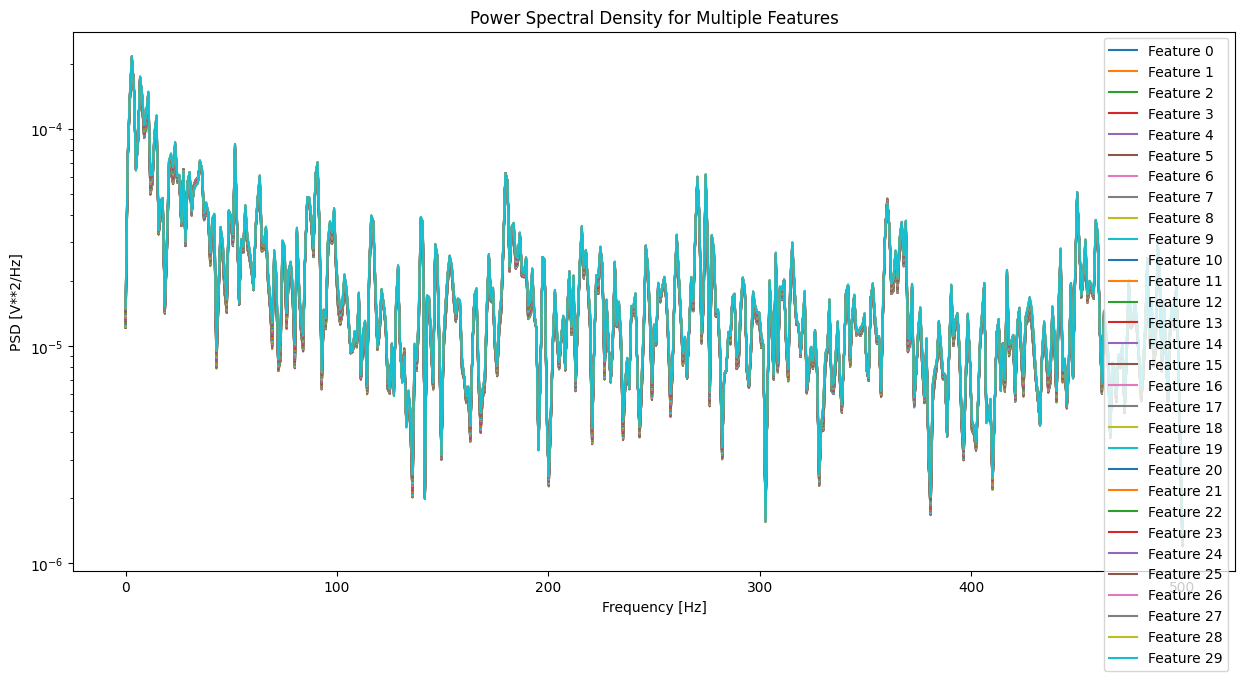

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Initialize a figure for plotting
plt.figure(figsize=(15, 7))

# Process each feature (or a subset, here we do the first 10 for demonstration)
for i in range(30):  # Adjust the range as needed
    data = X[:, i]  # This gets the ith feature across all samples
    f, Pxx_den = welch(data, fs, nperseg=1024)
    
    plt.semilogy(f, Pxx_den, label='Feature {}'.format(i))

plt.title('Power Spectral Density for Multiple Features')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()
plt.show()

In [ ]:
df.iloc[0, :-1].values.shape

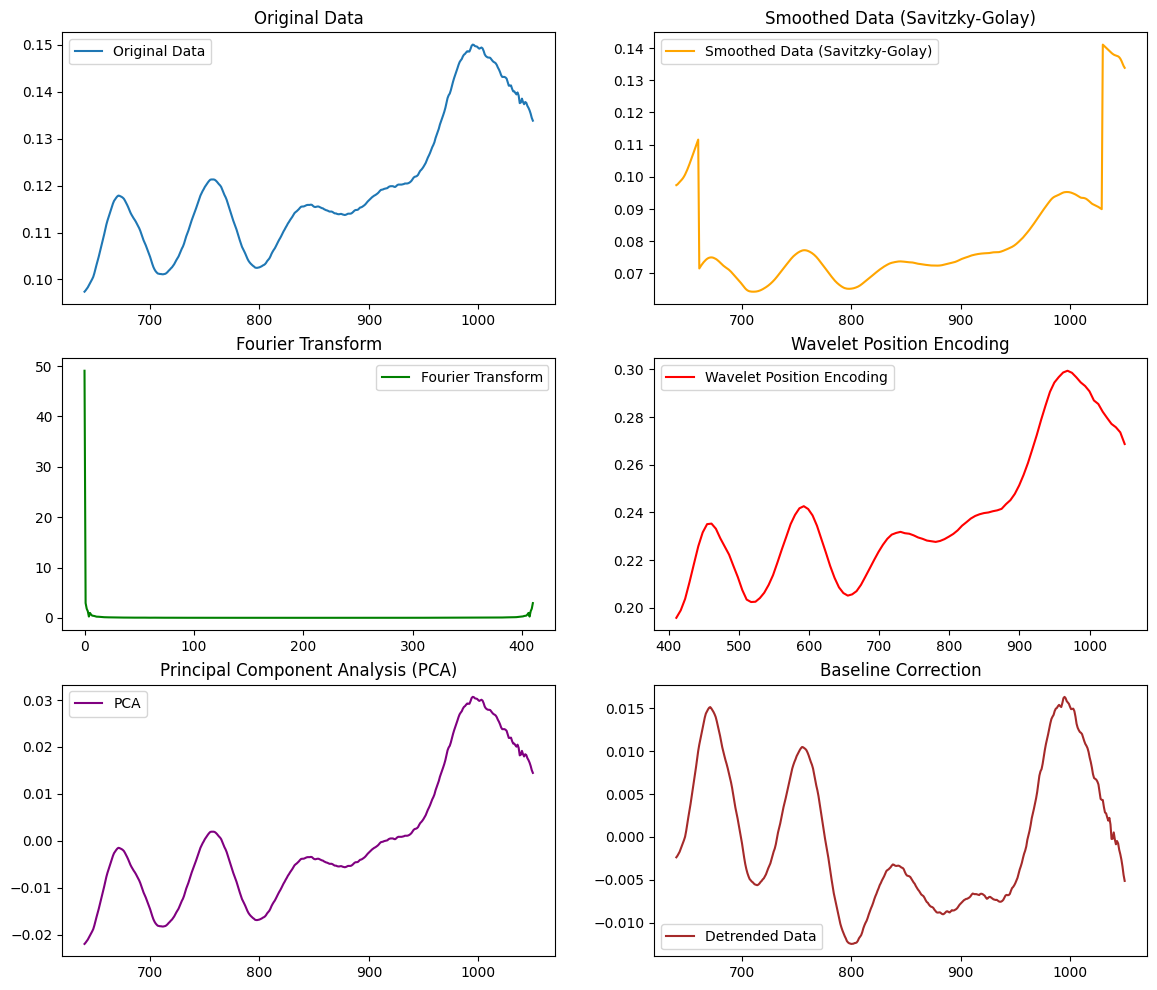

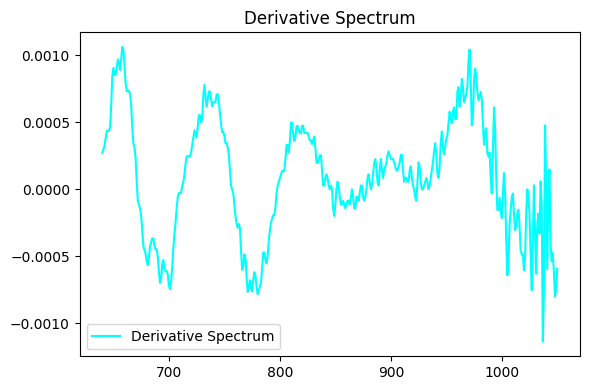

In [64]:
x_axis = np.arange(640, 1051)
# 假设 df 已经加载并处理好，这里使用 df 的第一行数据
first_row = df.iloc[5, :-1].values  # 假设第0列是波长，其余列是数据

# 1. Savitzky-Golay 滤波器
smoothed_data = savgol_filter(first_row, window_length=43, polyorder=12)

# 2. 傅里叶变换
fourier_transform = np.abs(fft(first_row))

# 3. 小波变换 (Wavelet Transform)
coeffs = pywt.wavedec(first_row, 'db1', level=2)  # 使用 Daubechies 1 小波，分解2级
wavelet_encoded = coeffs[0]

# 4. 主成分分析 (PCA)
pca = PCA(n_components=1)
pca_transformed = pca.fit_transform(first_row.reshape(-1, 1)).flatten()

# 5. 基线校正
detrended_data = detrend(first_row)

# 6. 导数光谱
derivative_data = np.gradient(first_row, x_axis)

# 绘图
plt.figure(figsize=(14, 12))

# 原始数据
plt.subplot(3, 2, 1)
plt.plot(x_axis, first_row, label='Original Data')
plt.title('Original Data')
plt.legend()

# Savitzky-Golay 滤波器
plt.subplot(3, 2, 2)
plt.plot(x_axis, smoothed_data, label='Smoothed Data (Savitzky-Golay)', color='orange')
plt.title('Smoothed Data (Savitzky-Golay)')
plt.legend()

# 傅里叶变换
plt.subplot(3, 2, 3)
plt.plot(np.arange(len(fourier_transform)), fourier_transform, label='Fourier Transform', color='green')
plt.title('Fourier Transform')
plt.legend()

# 小波变换
plt.subplot(3, 2, 4)
wavelet_x_axis = np.linspace(411, 1050, len(wavelet_encoded))
plt.plot(wavelet_x_axis, wavelet_encoded, label='Wavelet Position Encoding', color='red')
plt.title('Wavelet Position Encoding')
plt.legend()

# 主成分分析 (PCA)
plt.subplot(3, 2, 5)
plt.plot(x_axis, pca_transformed, label='PCA', color='purple')
plt.title('Principal Component Analysis (PCA)')
plt.legend()

# 基线校正
plt.subplot(3, 2, 6)
plt.plot(x_axis, detrended_data, label='Detrended Data', color='brown')
plt.title('Baseline Correction')
plt.legend()

# 导数光谱
plt.figure(figsize=(6, 4))
plt.plot(x_axis, derivative_data, label='Derivative Spectrum', color='cyan')
plt.title('Derivative Spectrum')
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
# Extracting the first row of data
first_row = data[0, :]

# Smoothing the data using Savitzky-Golay filter
smoothed_data = savgol_filter(first_row, window_length=5, polyorder=2)

# Fourier Transform of the original data
fourier_transform = np.abs(fft(first_row))

# Plotting the original data, smoothed data, and Fourier Transform
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(3, 1, 1)
plt.plot(first_row, label='Original Data')
plt.title('Original Data')
plt.legend()

# Plot smoothed data
plt.subplot(3, 1, 2)
plt.plot(smoothed_data, label='Smoothed Data', color='orange')
plt.title('Smoothed Data')
plt.legend()

# Plot Fourier Transform
plt.subplot(3, 1, 3)
plt.plot(fourier_transform, label='Fourier Transform', color='green')
plt.title('Fourier Transform')
plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'data' is not defined

In [21]:
# Calculate the number of samples for each category
category_counts = df['category'].value_counts().sort_index()
category_counts

category
0    152
1    152
2    140
3    145
4    156
5    158
Name: count, dtype: int64

151
139
144
155
157
151


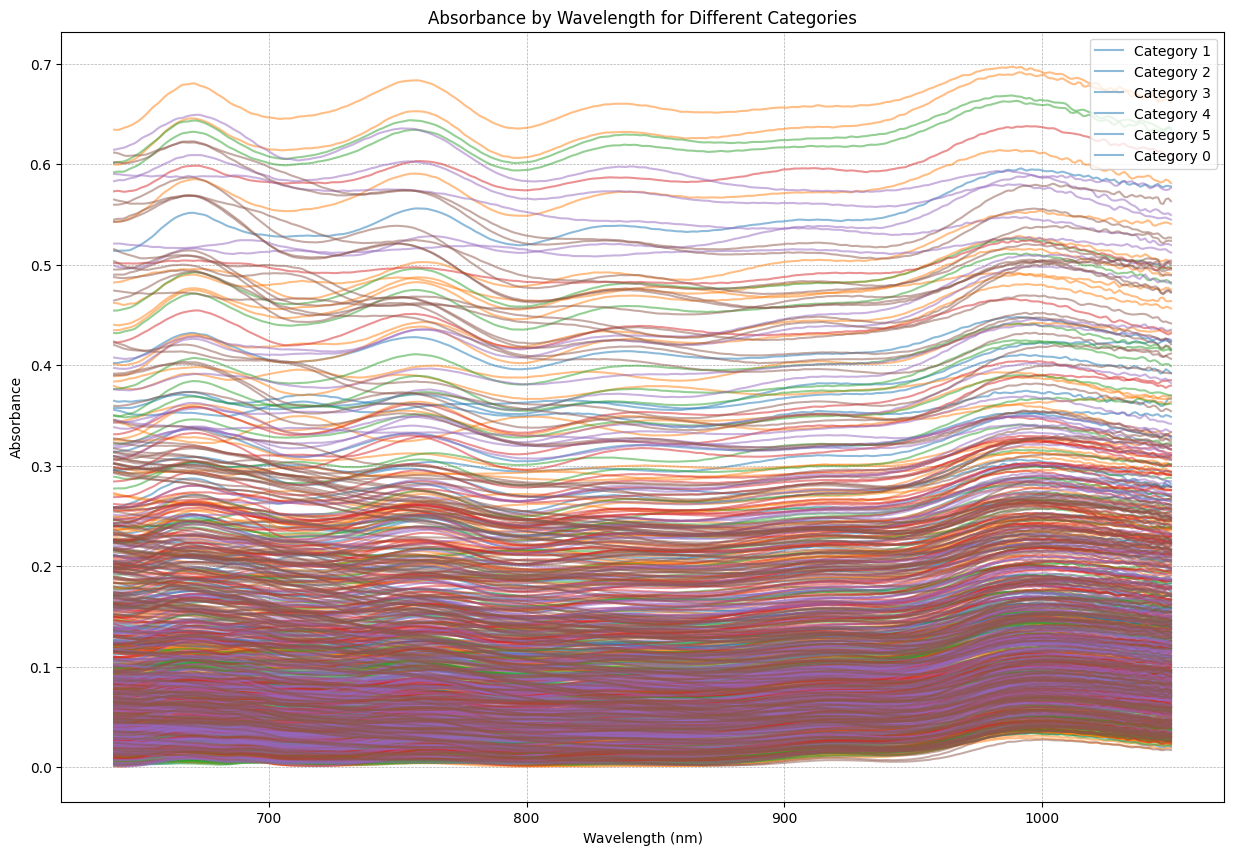

In [22]:
# Separate data by category
categories = df['category'].unique()
category_colors = {category: plt.cm.tab10(i) for i, category in enumerate(categories)}
# Plot the data
plt.figure(figsize=(15, 10))

for category in categories:
    subset = df[df['category'] == category].drop(columns='category')
    for i in range(subset.shape[0]):
        plt.plot(subset.columns, subset.iloc[i, :], color=category_colors[category], alpha=0.5)
# Customize the plot
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Absorbance by Wavelength for Different Categories')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend([f'Category {cat}' for cat in categories], loc='upper right')
plt.show()

In [14]:
categories

array([1, 2, 3, 4, 5, 0], dtype=int64)

In [11]:
subset.shape[0]

152

### 初始卷积层的卷积核权重

In [1]:
import torch
import matplotlib.pyplot as plt
from models.model import CNN1D, V2

In [5]:
model_V1 = torch.load('weights/v1_6_binary_best.pth')
model_V1.eval()  # 切换模型到评估模式

CNN1D(
  (conv1): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(32, 64, kernel_size=(17,), stride=(1,))
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv1d(64, 128, kernel_size=(47,), stride=(1,))
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=2944, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)

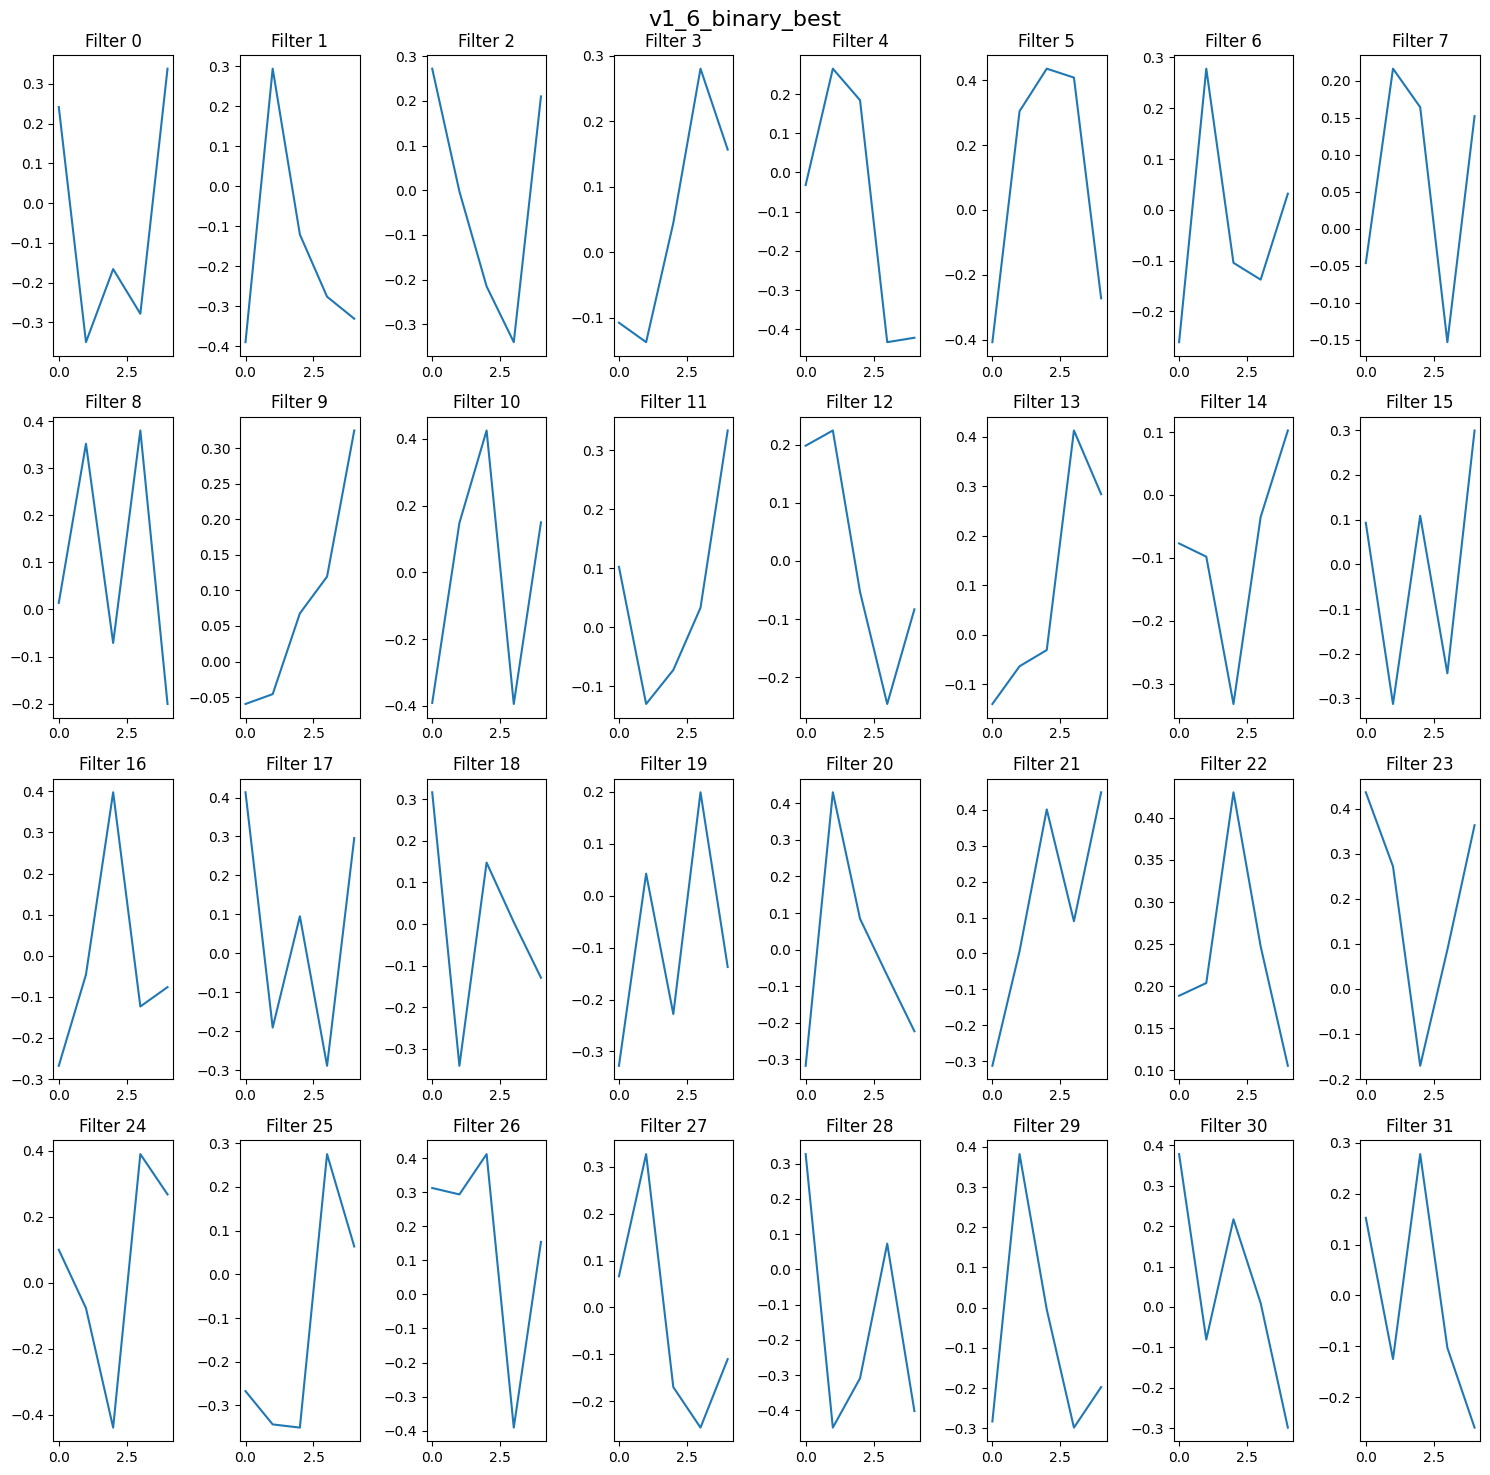

In [6]:

def plot_conv_weights(weights, title, subplot_shape):
    num_filters = weights.shape[0]
    fig, axes = plt.subplots(subplot_shape[0], subplot_shape[1], figsize=(15, 15))
    fig.suptitle(title, fontsize=16)

    for i in range(num_filters):
        ax = axes[i // subplot_shape[1], i % subplot_shape[1]]
        ax.plot(weights[i][0])
        ax.set_title(f'Filter {i}')

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# 获取卷积核权重
conv1_weights = model_V1.conv1.weight.data.cpu().numpy()

# 假设你有4行8列的卷积核
plot_conv_weights(conv1_weights, 'v1_6_binary_best', (4, 8))

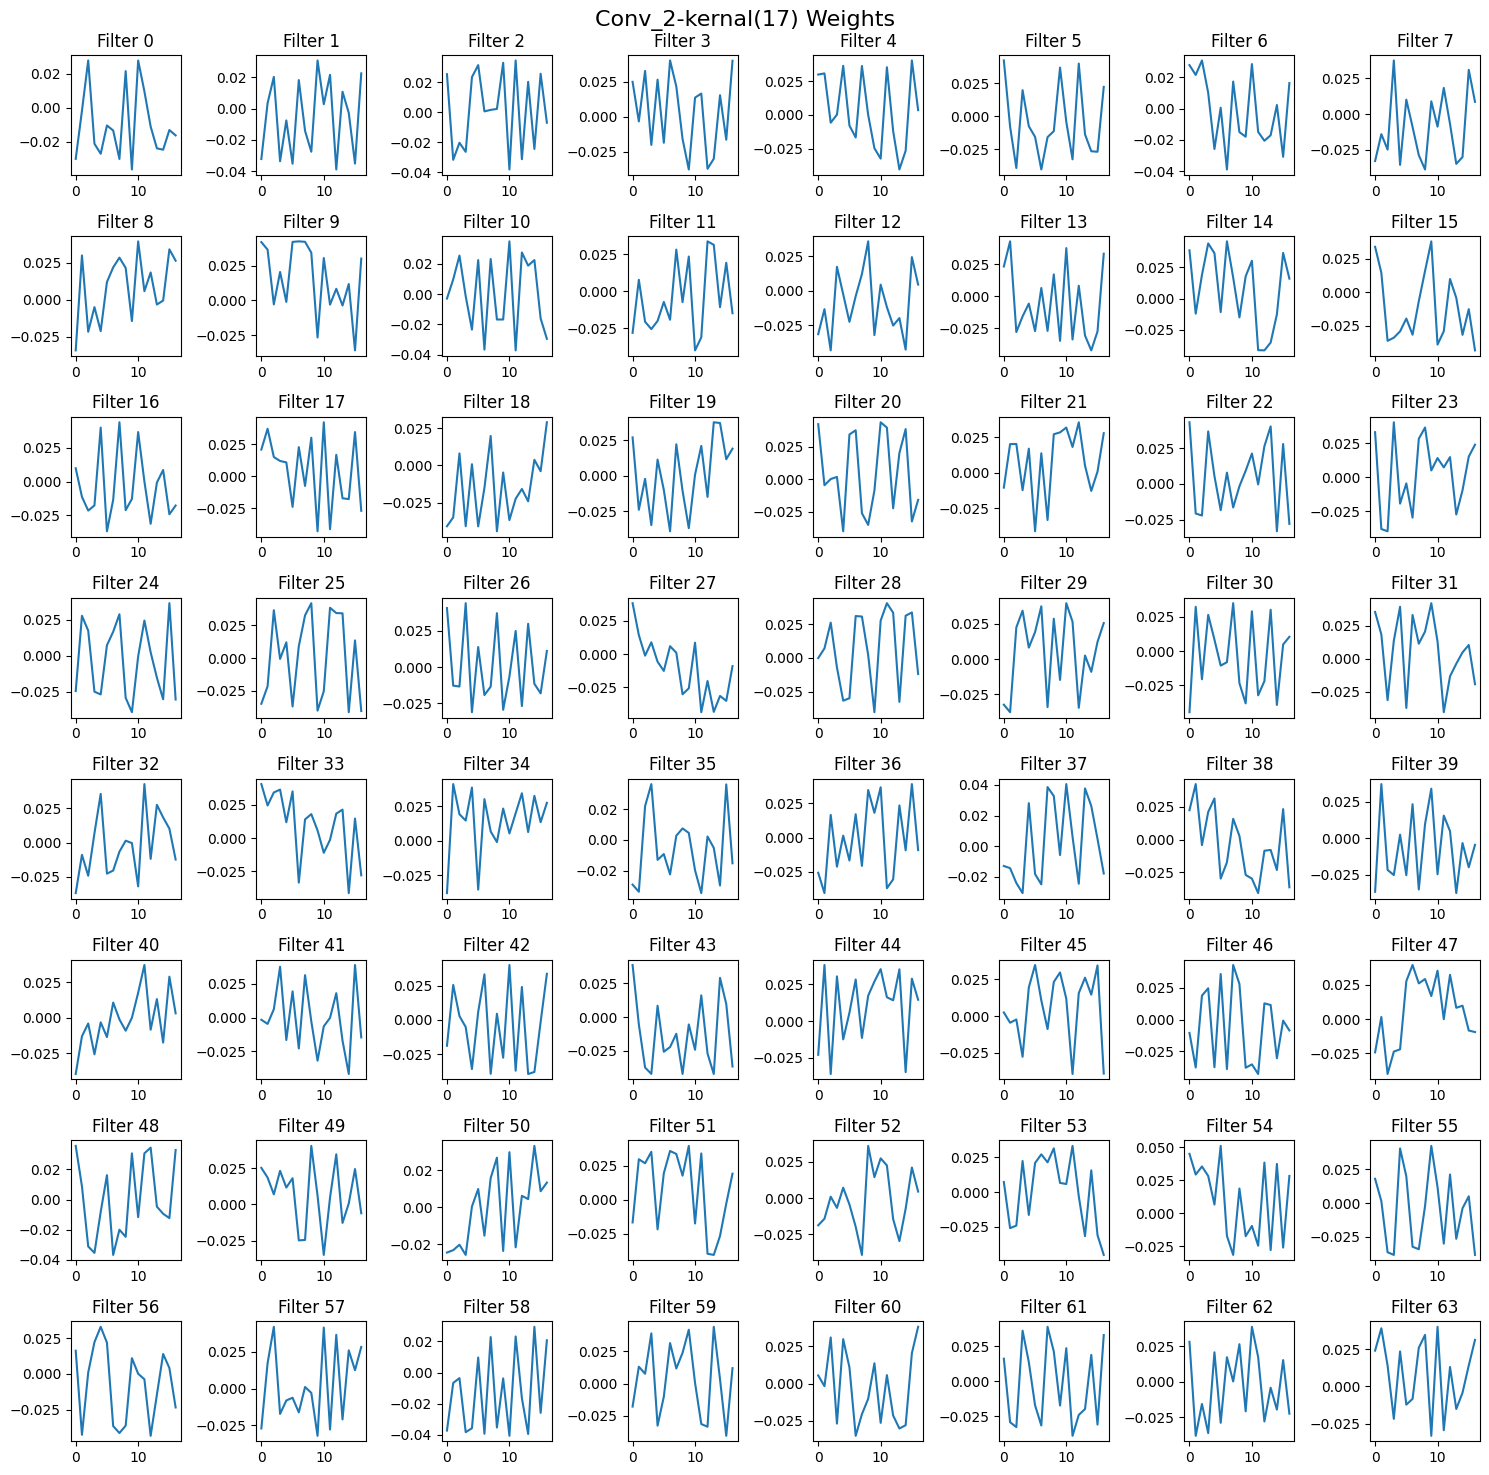

In [11]:
conv2_weights = model_V1.conv2.weight.data.cpu().numpy()
plot_conv_weights(conv2_weights, 'Conv_2-kernal(17) Weights', (8, 8))

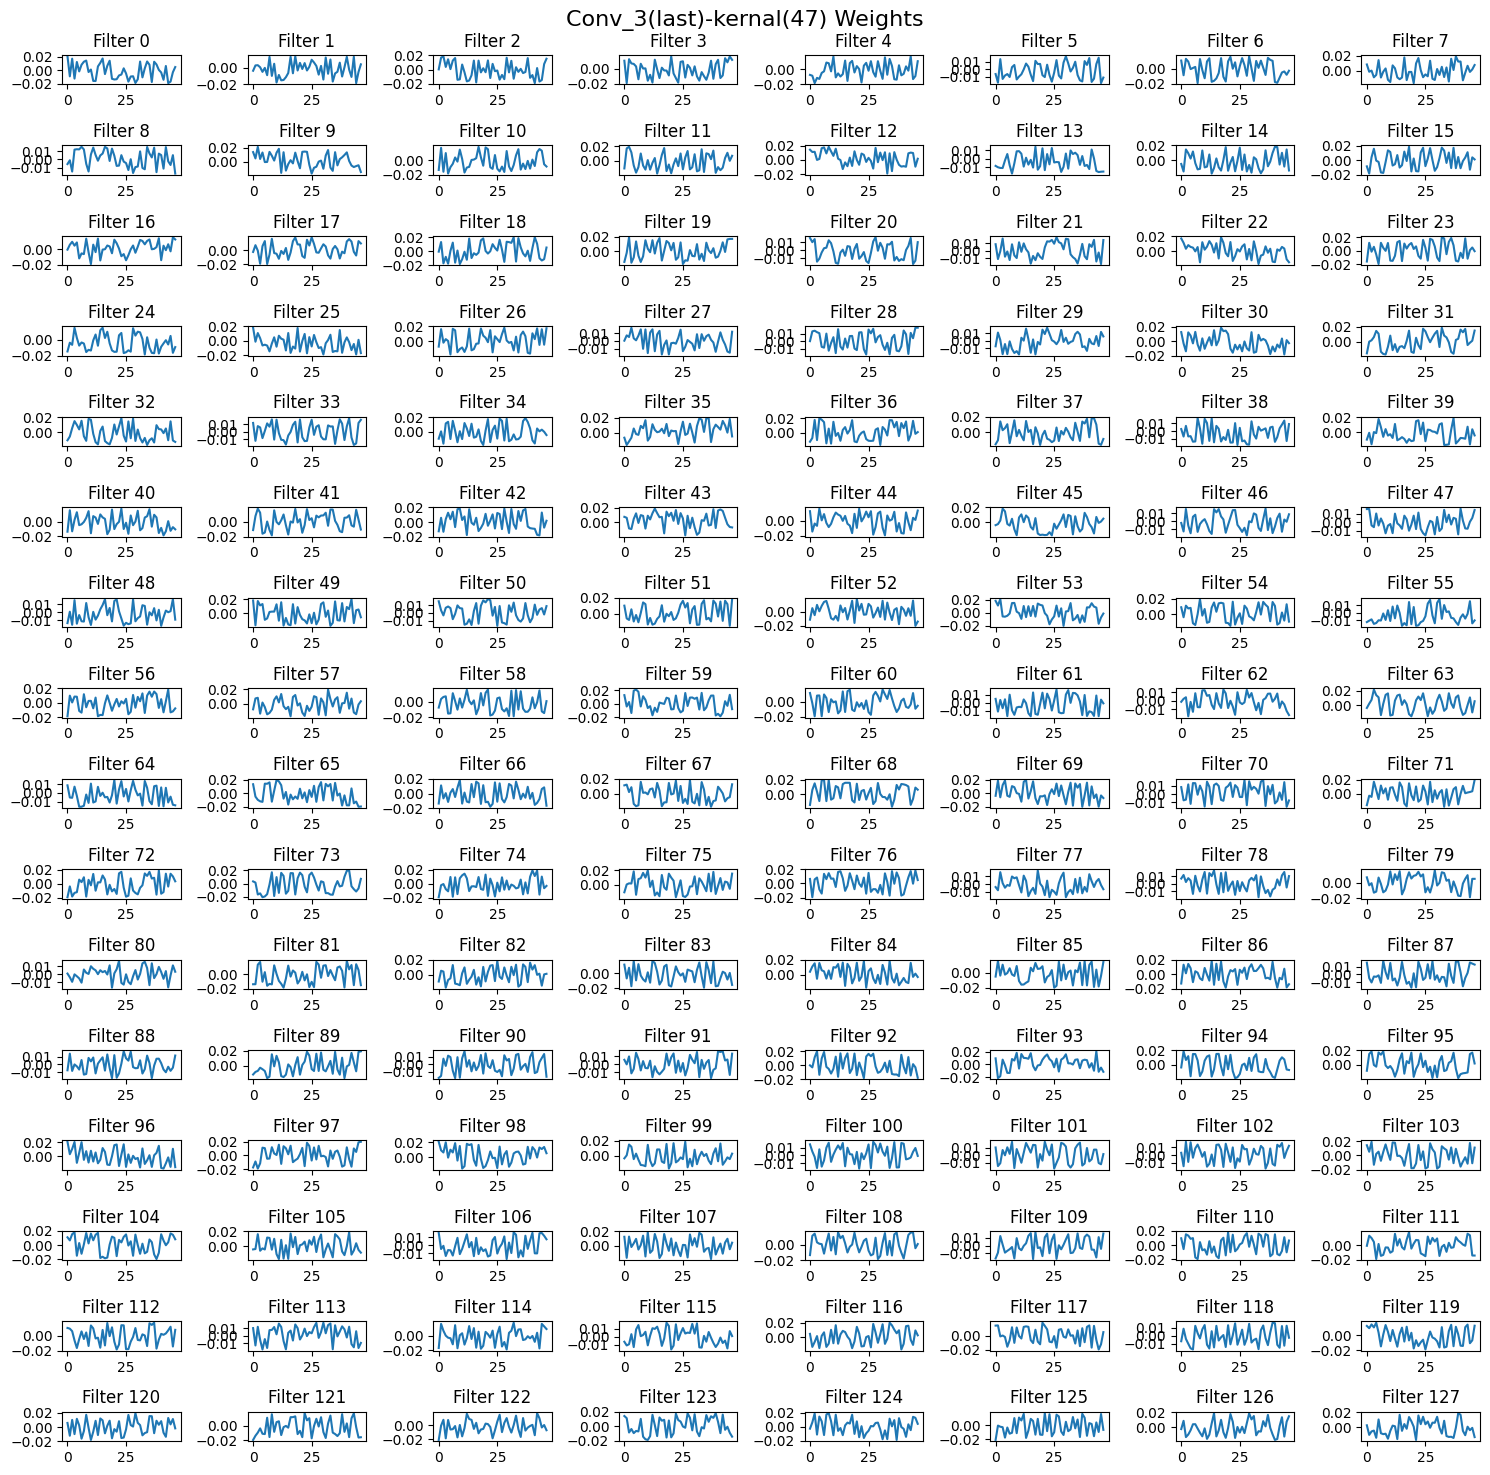

In [9]:
conv3_weights = model_V1.conv3.weight.data.cpu().numpy()
plot_conv_weights(conv3_weights, 'Conv_3(last)-kernal(47) Weights', (16, 8))

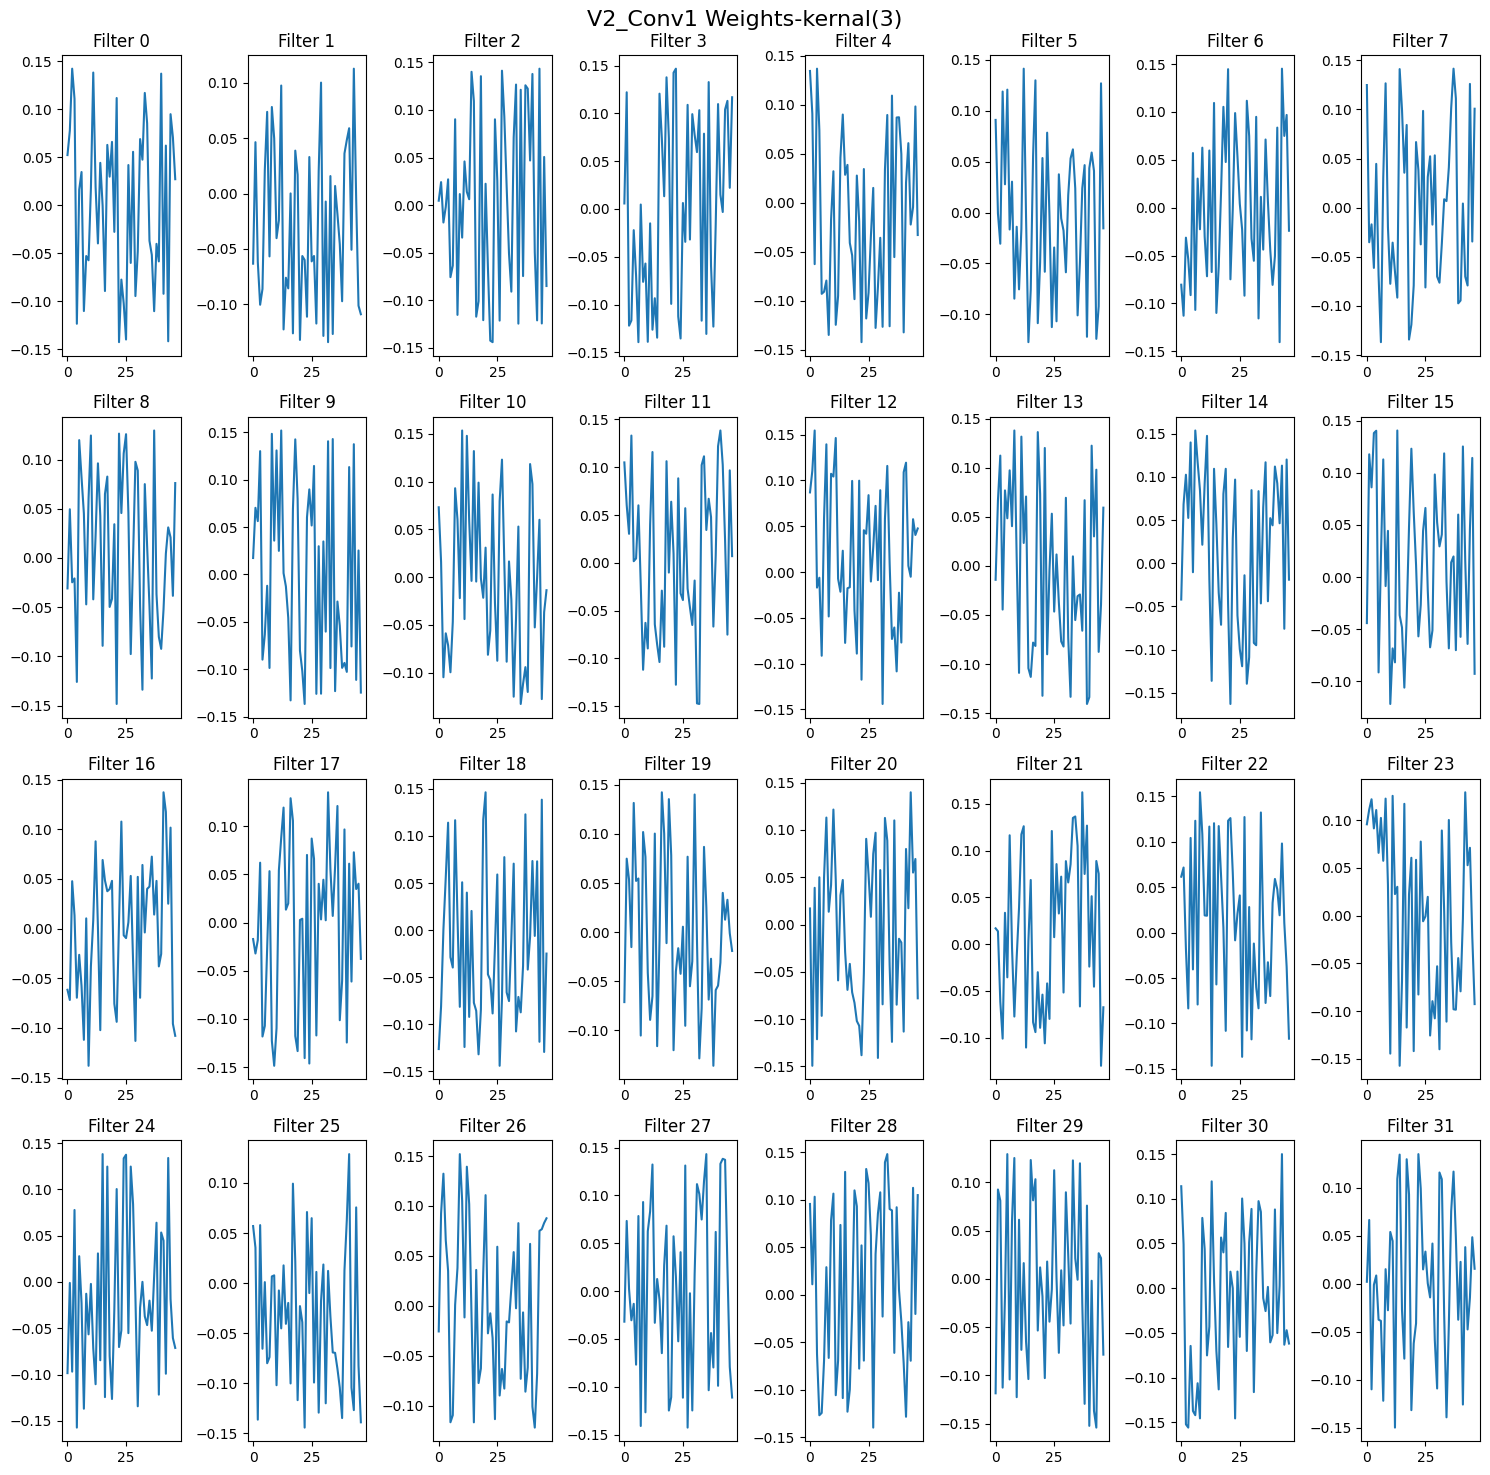

In [7]:
model_V2 = torch.load('weights/v2_6_binary.pth')
model_V2.eval()  # 切换模型到评估模式

# 获取卷积核权重
conv1_weights = model_V2.conv1.weight.data.cpu().numpy()

# 假设你有4行8列的卷积核
plot_conv_weights(conv1_weights, 'V2_Conv1 Weights-kernal(3)', (4, 8))

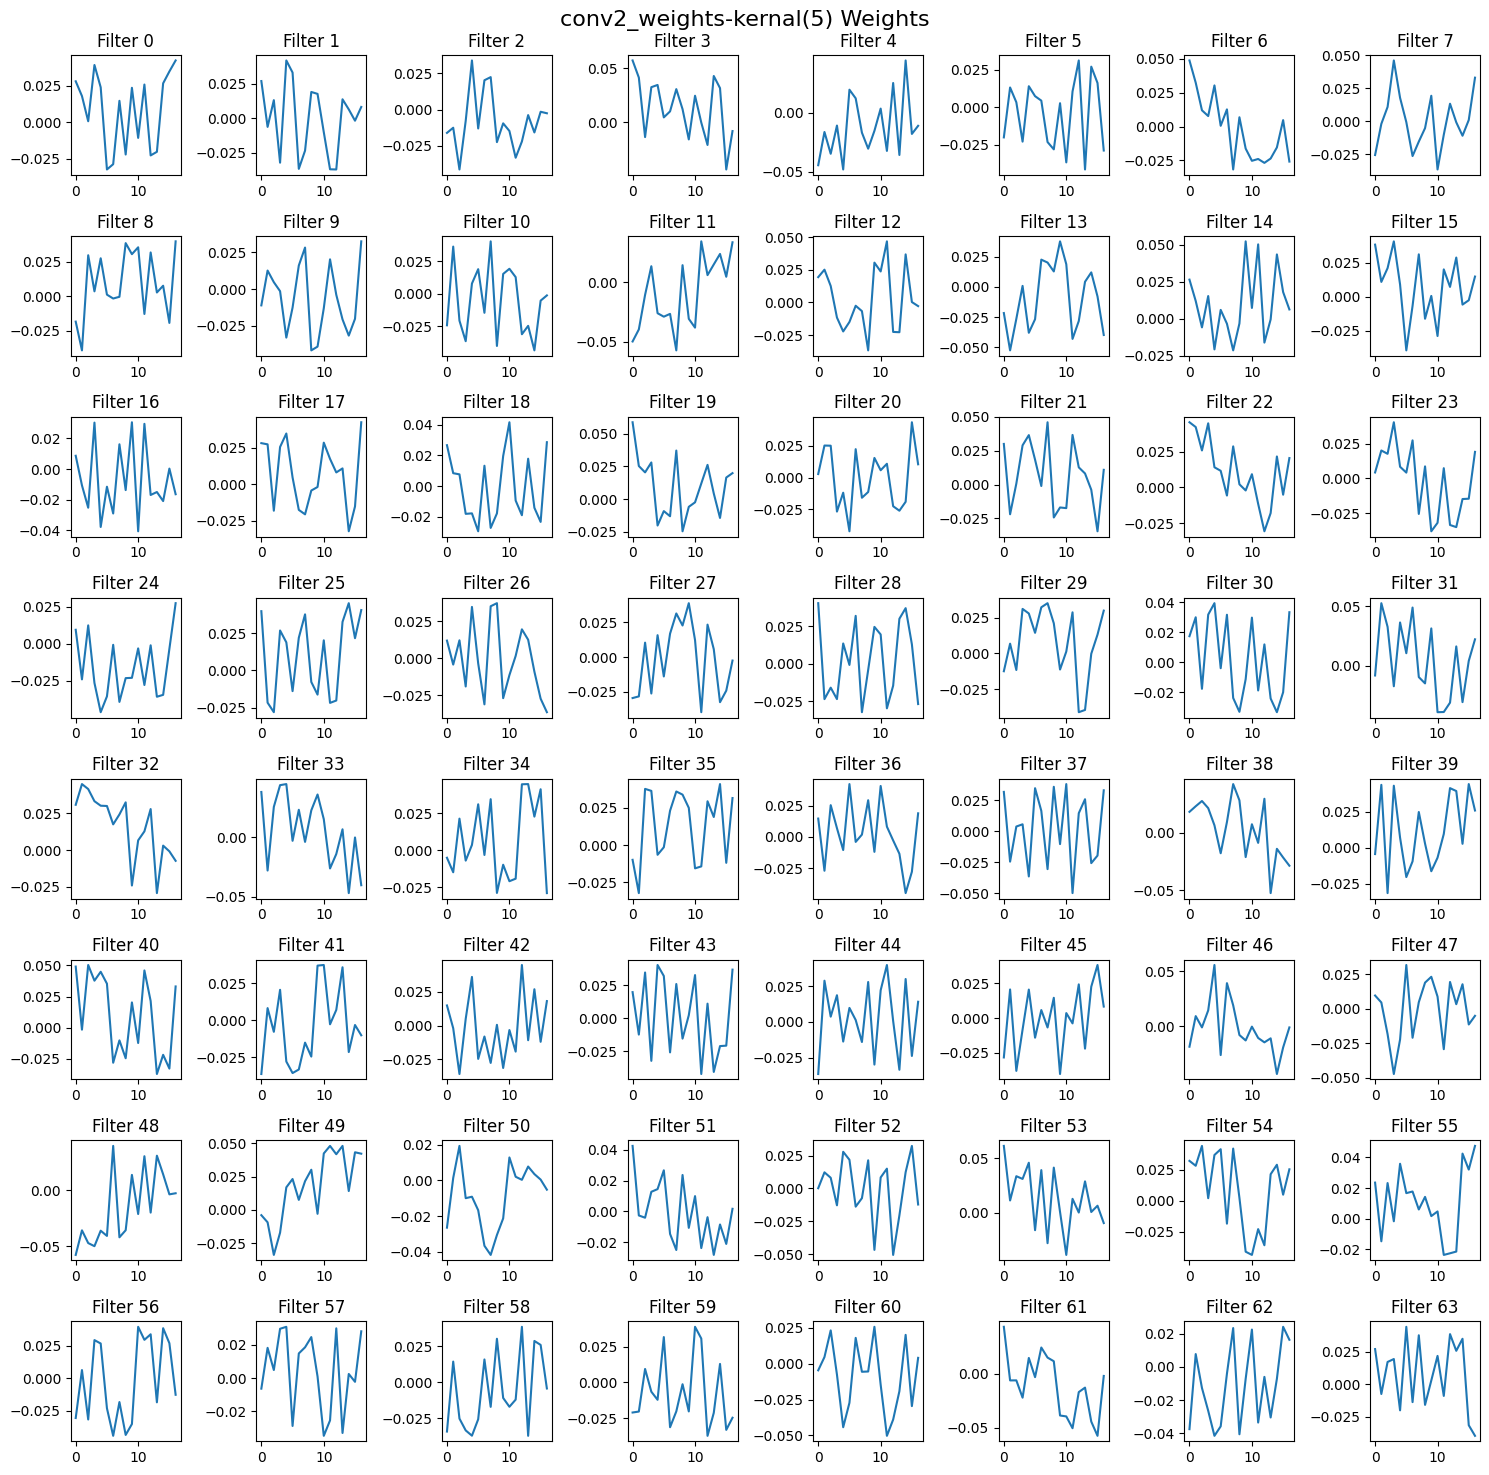

In [9]:
conv4_weights = model_V2.conv2.weight.data.cpu().numpy()
plot_conv_weights(conv4_weights, 'conv2_weights-kernal(5) Weights', (8, 8))

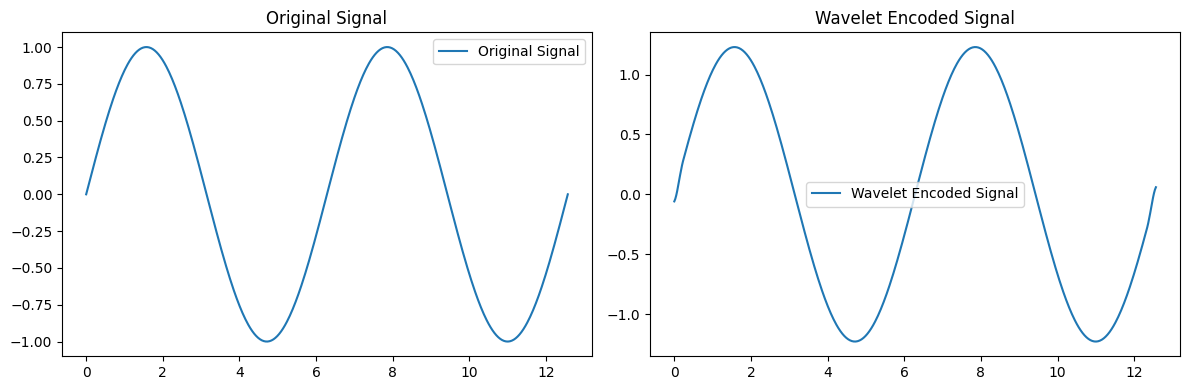

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def mexican_hat_wavelet(size, scale, shift):
    x = torch.linspace(-(size-1)//2, (size-1)//2, size)
    x = x - shift
    C = 2 / (3**0.5 * torch.pi**0.25)
    wavelet = C * (1 - (x/scale)**2) * torch.exp(-(x/scale)**2 / 2) / (torch.abs(torch.tensor(scale))**0.5)
    return wavelet

def apply_wavelet_encoding(signal, wavelet_size, scale, shift):
    D = signal.shape[0]
    wavelet_kernel = mexican_hat_wavelet(size=wavelet_size, scale=scale, shift=shift)
    encoded_signal = torch.nn.functional.conv1d(signal.unsqueeze(0).unsqueeze(0), wavelet_kernel.unsqueeze(0).unsqueeze(0), padding='same')
    return encoded_signal.squeeze()

# 生成一条简单的曲线
x = np.linspace(0, 4 * np.pi, 500)
y = np.sin(x)

# 绘制原始曲线
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Original Signal')
plt.title('Original Signal')
plt.legend()

# 将曲线转换为tensor
y_tensor = torch.tensor(y, dtype=torch.float32)

# 应用小波位置编码
wavelet_size = 19
scale = 5.0
shift = 0.0
encoded_y_tensor = apply_wavelet_encoding(y_tensor, wavelet_size, scale, shift)

# 绘制小波位置编码后的曲线
plt.subplot(1, 2, 2)
plt.plot(x, encoded_y_tensor.numpy(), label='Wavelet Encoded Signal')
plt.title('Wavelet Encoded Signal')
plt.legend()

plt.tight_layout()
plt.show()
